In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine, norm
%matplotlib inline

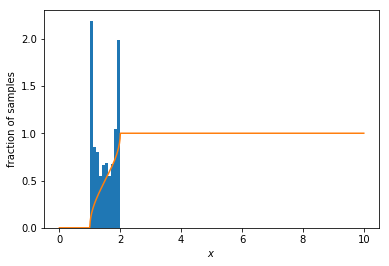

In [29]:
# Выбираем распределение Арксинуса
arcsin_rv = arcsine(1)

# Генерируем выборку объемом в 1000
selection = arcsin_rv.rvs(size=1000)

# Строим Гистограмму из нашей выборки
# !!! Note: заменил normed на density т.к. использую python 3.7 с более новой версией Matplotlib
plt.hist(selection, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Строим функцию распределения
x = np.linspace(0,10,1000)
cdf = arcsin_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')


In [30]:
initialDispersion = np.var(selection)
initialAvg = np.mean(selection)

print(initialDispersion)
print(initialAvg)

# Дисперсия по начальной выборке = 0.1266130641242096
# Среднее выборочное по начально выборке = 1.5037360790556908

0.12760135102254322
1.4953498294541054


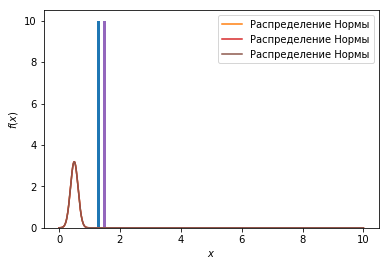

In [32]:
volumes = [5, 10, 50]

def getVolumeGraphs(n):
    # Переменная определяющая распределение по объему
    arrangementByVol = arcsin_rv.rvs(n)
    volMeanValues = []
    # Цикл расчитывающий среднее для всех выборок по объему
    for i in range(1000):
        volMeanValues.append(arrangementByVol.mean())
    # Рисуем гистограмму
    plt.hist(volMeanValues, density=True)
    # Рисуем распределение плотности
    x = np.linspace(0,10,1000)
    graphNorm = norm.pdf(x, 0.5, 0.125)
    plt.plot(x, graphNorm, label="Распределение Нормы")
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

for volume in volumes:
    getVolumeGraphs(volume)